## Task 1. Análisis teórico

#### Considere cada uno de los siguientes escenarios y responda según corresponda:

1. Como director de un proyecto de conducción autónoma, debe dimensionar el hardware para un
nuevo vehículo. El sistema utiliza 8 cámaras que capturan video a resolución 4K UHD (3840 x 2160).
Debido a la necesidad de alto rango dinámico (HDR), los sensores operan a 12 bits por píxel (Raw
Bayer Pattern) a 60 FPS.Métrica A: Enfocada puramente en el flujo vehicular.  

**a. Calcule el tamaño exacto de una sola imagen (frame) cruda en Megabytes (MB).**  

**R//** 8294400 píxeles × 12 bits = 99532800 bits  
99532800 ÷ 8= 12441600 bytes  
12441600 ÷ 10^6 = 12.44 MB por frame​  


12.44 MB por frame


**b. Calcule el ancho de banda necesario (en Gbps) para transmitir el flujo de las 8 cámaras al procesador central sin compresión.**  

**R//**
12.44MB × 60 = 746.4 MB/s    
746.4 × 8 = 5971.2     
Mbps = 5.97 Gbps    
5.97 × 8 = 47.8 Gbps    
**47.8 Gbps**


**c. Si su procesador tiene una memoria RAM reservada de 16 GB exclusivamente para el buffer de video, ¿cuántos segundos de historia puede almacenar antes de empezar a sobrescribir datos?**  

**R//**
Si consideramos las 8 caamaras con un ancho de banda de 47.8 Gbps.  
47.8 Gbps / 8 = 5.975 GBps   
16 GB / 5.975 GBsp =~ 2.68s  
**2.68 s**  


**d. Basado en su resultado, ¿es viable enviar estos datos "crudos" a la nube en tiempo real usando 5G? Justifique**  
 
**R//**
No es viable enviar video crudo 4K HDR en tiempo real por 5G, el ancho de banda requerido excede ampliamente las capacidades reales de la red y compromete seguridad y latencia.



-----------------


2. Considere un píxel con valor de intensidad Iin=50 en una imagen estándar de 8 bits (0−255). Se aplican dos procesos de mejora secuenciales en el siguiente orden:

I. Corrección Gamma con γ=0.5 (para expandir sombras).
II. Ajuste Lineal con ganancia α=1.2 y brillo β=-10 (para contrastar).
Realice los cálculos en el dominio de flotantes normalizados [0,1] como dicta la buena práctica y
convierta a entero de 8 bits solo al final.



a. Calcule el valor final del píxel I_out.  

**R//**
Iin = 50  
Inorm = 50/255 = 0.19  
Igamma = (0.5)^( γ=0.5) = 0.44  
Ilin = (0.044)*(1.2) + (10)= -9.47  
CLAMP(-9.74) = 0  
I_out = 0  
**0**  

b. ¿Hubo saturación (clipping) en el proceso?  
**R//**
Si, el valor de Beta siendo -10 se sale bastante del rango de [0,1] y convierte a todos los valores a 0

c. Si hubiéramos realizado las operaciones usando uint8 directamente sin convertir a float
(truncando decimales en cada paso intermedio), ¿cuál habría sido el error numérico
resultante?  

**R//**
Al usar principalmente uint8 el error que se hubiera mostrado de primero seria la operacion gamma donde la truncacion de decimales, especialmente en valores bajos, lleva a una acumulacion de error. Tambien en la lineal, por usar valores decimales y el 10 en beta, truncarlos y manejarlos como u8 acumula tambien errores al resultado final


-----------------


3. Usted está programando un robot clasificador de pelotas. Tiene dos objetos: una pelota roja brillante bajo el sol R_rgb=(255,0,0) y la misma pelota roja en una sombra profunda S_rgb=(50,0,0)  

a. Calcule la distancia entre estos dos colores en el espacio RGB.  

**R//**  
distancia =  $\sqrt{(255-50)^2 + (0-0)^2  + (0-0)^2} =  205$. 

b. Convierta ambos colores al espacio HSV (asuma rangos normalizados H∈[0,1],S∈[0,1],V∈[0,1] para simplificar, sabiendo que el Hue del rojo es 0).  
**R//**

(255,0,0)→(1,0,0)    
V = max = 1  
S = (v-min)/v = 1  
H = 0   

HSVR​=(0,1,1)​


(50,0,0)→(25550​,0,0)≈(0.196,0,0)  
V = max = 0.196  
S = (v-min)/v = 1  
H = 0   


HSVS​=(0,1,0.196)


c. Calcule la diferencia absoluta canal por canal en HSV   

ΔH = |0-0| = 0
ΔS = |1-1| = 0
ΔV = |1-0.196| = 0.804

ΔHSV = (0,0,0.804)


d. Argumente matemáticamente por qué un algoritmo de agrupación (clustering) simple fallaría en RGB pero funcionaría en HSV para determinar que ambos píxeles pertenecen al mismo objeto "pelota roja".   

RGB, matemáticamente mezcla información de de color e iluminación, lo que hace que la distancia entre los dos colores sea muchisimo mayor y provoca que un algoritmo k-means o distancia euclariana los separe en clusters distintos. Por otro lado en el HSV se puede ignorar el V que representa la iluminación o darle un menor peso para que no se haga esta separación y se agrupe correctamente al objeto 

### Task 2 Práctica
Su objetivo es implementar un pipeline de pre-procesamiento manual, manipulando tensores y gestionando
tipos de datos (uint8 vs float32) sin utilizar funciones de "caja negra" para la matemática. Puede utilizar el
esqueleto de código lab_semana1.py que se adjuntó en el portal. Se permite el uso de numpy, opencv-python
(solo para I/O y conversiones de espacio de color), matplotlib.

#### Ejercicio 1
mplemente la función manual_contrast_brightness(image, alpha, beta). Para ello, debe convertir la imagen
a float32, normalizar, aplicar la fórmula lineal 𝑔(𝑥) = 𝛼𝑓(𝑥) +, hacer clipping para asegurar el rango [0
, 1]
y regresar a uint8. Note que no puede usar cv2.convertScaleAbs. Debe hacerlo con pura manipulación de
matrices NumPy.

In [6]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def manual_contrast_brightness(image, alpha, beta):
    # parse array
    arr =np.asarray(image, dtype=np.float32)
    # normalize
    arr = np.clip(arr/ 255.0, 0, 1)
    # g(x) = a*x + b
    arr*= alpha
    arr+= beta
    # clip
    arr = np.clip(arr, 0, 1)
    # back to uint8
    arr = np.round(arr*255.0)
    return arr.astype(np.uint8)

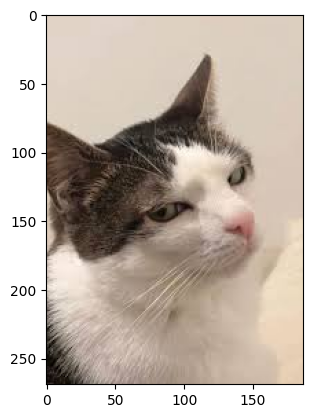

In [7]:
# Example
img = Image.open("testimage.jpg")
plt.imshow(img)

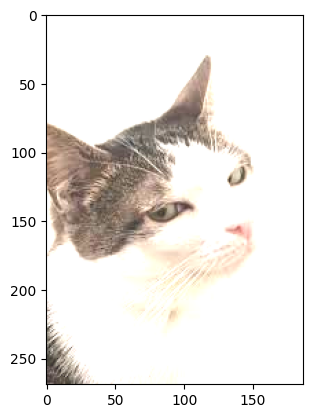

In [8]:
corrected1 = manual_contrast_brightness(img, alpha=1.5, beta=0.2)
plt.imshow(corrected1)

#### Ejercicio 2. Implemente la función manual_gamma_correction(image, gamma). Para ello:
• Implemente la ecuación 𝑉𝑜𝑢𝑡 = 𝑉𝑖𝑛𝛾  
• Recuerde que la operación de potencia es costosa. Aunque en producción usaríamos una LUT (Look-
Up Table), aquí quiero que vectorice la operación de potencia sobre la matriz flotante.

In [9]:
import numpy as np

def manual_gamma_correction(image, gamma):
    

    # Convertir a float32
    img = image.astype(np.float32)

    # Normalizar a [0,1] si viene en uint8
    if img.max() > 1.0:
        img /= 255.0

    # Corrección gamma vectorizada
    gamma_img = np.power(img, gamma)

    return gamma_img


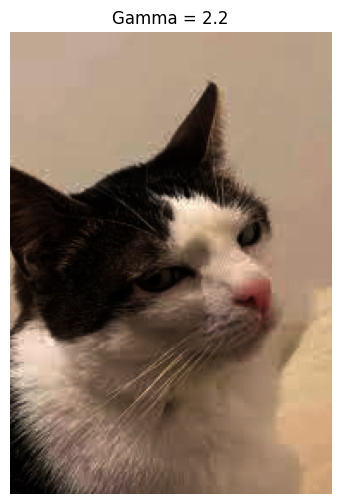

In [10]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("testimage.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Aplicar gamma
gamma_corrected = manual_gamma_correction(img, gamma=2.2)

# Mostrar
plt.figure(figsize=(6,6))
plt.imshow(gamma_corrected)
plt.title("Gamma = 2.2")
plt.axis('off')
plt.show()


#### Ejercicio 3: Segmentación Cromática
Implemente la función hsv_segmentation(image). Para ello:
- Cargue una imagen de prueba (algo colorido).
- Conviértala a HSV.
- Defina manualmente los rangos (lower_bound, upper_bound) para aislar un color específico (ej. el amarillo de un banano o el rojo de una manzana).
- Genere una máscara binaria y úsela para mostrar solo el objeto segmentado sobre un fondo negro.

In [11]:
import cv2

def hsv_segmentation(image):
    # a np.uint8
    arr = np.asarray(image)
    if arr.dtype != np.uint8:
        arr = arr.astype(np.uint8)

    # Si viene en escala de grises lo pasamos a 3 canales
    if arr.ndim == 2:
        arr = cv2.cvtColor(arr, cv2.COLOR_GRAY2RGB)

    # OpenCV trabaja en BGR, pero la imagen esta en RGB
    bgr = cv2.cvtColor(arr, cv2.COLOR_RGB2BGR)
    hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)

    # RANGOS MANUALES

    # # NARANJA
    # lower = np.array([11, 80, 50], dtype=np.uint8)
    # upper = np.array([19, 255, 255], dtype=np.uint8)

    # # AMARILLO
    # lower = np.array([20, 80, 50], dtype=np.uint8)
    # upper = np.array([35, 255, 255], dtype=np.uint8)

    # # VERDE
    lower = np.array([36, 60, 40], dtype=np.uint8)
    upper = np.array([85, 255, 255], dtype=np.uint8)

    # # AZUL
    # lower = np.array([100, 80, 40], dtype=np.uint8)
    # upper = np.array([130, 255, 255], dtype=np.uint8)

    # # MORADO
    # lower = np.array([131, 60, 40], dtype=np.uint8)
    # upper = np.array([160, 255, 255], dtype=np.uint8)

    # Mascara binaria
    mask = cv2.inRange(hsv, lower, upper)

    # limpiar ruido
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    # Aplicar mascara
    segmented_bgr = cv2.bitwise_and(bgr, bgr, mask=mask)

    # a RGB
    segmented_rgb = cv2.cvtColor(segmented_bgr, cv2.COLOR_BGR2RGB)

    return mask, segmented_rgb, (lower, upper)


Lower: [36 60 40] Upper: [ 85 255 255]


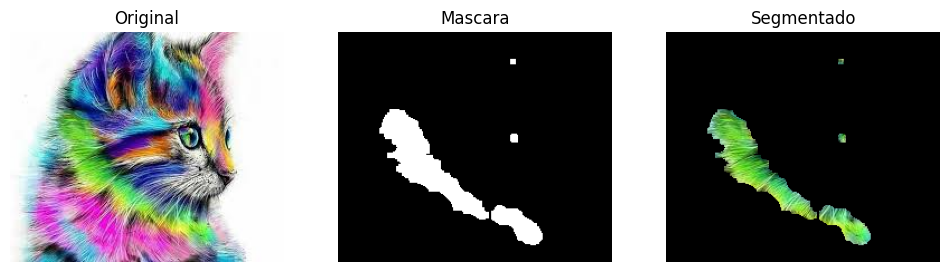

In [12]:
image2 = Image.open("testImage2.png")

mask, segmented, (lb, ub) = hsv_segmentation(image2)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(image2); plt.title("Original"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(mask, cmap="gray"); plt.title("Mascara"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(segmented); plt.title("Segmentado"); plt.axis("off")

print("Lower:", lb, "Upper:", ub)


### Task 3. Preguntas Post-Práctica

Responda brevemente (máximo 3 líneas por respuesta):
1. En la diapositiva 15 se mencionó que "Iterar píxel a píxel en Python es un Pecado Capital". Explique en términos de gestión de memoria y CPU por qué una operación vectorizada en NumPy es órdenes de magnitud más rápida que un for loop.

**R//**
Python es un lenguaje interpretado y no compilado, sus operaciones (incluyendo ciclos) necesitan revisiones y traducciones por cada elemento que introducen demasiado ovehead. Mientras librerias como numpy que aplican vectorizacion ejecutan codigo basicamente en C compilado con memoria contigua y sin revisiones constantes

2. Al visualizar imágenes con matplotlib, ¿qué sucede si olvida que OpenCV carga las imágenes en formato BGR? ¿Cómo se ve visualmente el error?

Los canales de color quedan intercambiados al mostrarse como RGB. El azul se intercambia con el rojo, y eso causa un efecto de lavado o algo por ell estilo.


3. Al visualizar imágenes con matplotlib, ¿qué sucede si olvida que OpenCV carga las imágenes en formato BGR? ¿Cómo se ve visualmente el error?

Lo mismo que en el caso anterior, se intercambian los colores, se ve un efecto como mas brilloso, que no es el original.